## Population (Catherine)##

In [115]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import random

Nous souhaitons obtenir l'évolution de la population jusqu'à une année "a" choisie sur chacun des continents. 

Celle-ci dépend de différents paramètres : 

**la population de départ**, dont les données ont été prises à l'année 2017 par l'ONU (on considère que l'année 2017 est l'année 0)

**le taux d'accroissement**, dont les valeurs fixes viennent de l'INED

**les imprévus** qui peuvent survenir (guerre, épidémie, ect. mais la nature de ces problèmes et leurs conséquences n'ont pas été pris en compte)

In [140]:
continents=["Europe", "Amérique du Nord","Asie", "Afrique", "Amérique du Sud", "Océanie"]
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}


Nous avons décidé de se baser sur l'évolution exponentielle de la population, c'est l'évolution la plus réaliste. 

Elle suit la loi suivante :

**N(t)=N0*exp(k*t)**

N étant la population, N0 la population à la 1ère génération, k étant le taux d'accroissement, et t l'année.

On décide donc en premier temps de calculer **k**. Ce dernier se base sur le taux de natalité et de mortalité. Ceux-ci peuvent rester fixe au fil du temps, ou varier d'une manière aléatoire. Il a ensuite fallu créer 6 taux d'accroissement afin que l'on puisse faire varier chaque taux pour chaque pays, et décider si k restait fixe ou non au fil du temps.

In [117]:
def k1(n1,m1,fixe1):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe1 : 
        k1=(n1-m1)/100
    else :
        k1=(n1-m1)*u/100
    
    return k1

def k2(n2,m2,fixe2):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe2 : 
        k2=(n2-m2)/100
    else :
        k2=(n2-m2)*u/100
    
    return k2

def k3(n3,m3,fixe3):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe3 : 
        k3=(n3-m3)/100
    else :
        k3=(n3-m3)*u/100
    
    return k3

def k4(n4,m4,fixe4):
    """int^2*bool->float
    n: nombre de naissances, m1: nombre de décès"""
    
    u=random.random()
    
    if fixe4 : 
        k4=(n4-m4)/100
    else :
        k4=(n4-m4)*u/100
    
    return k4

def k5(n5,m5,fixe5):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe5: 
        k5=(n5-m5)/100
    else :
        k5=(n5-m5)*u/100
    
    return k5

def k6(n6,m6,fixe6):
    """int^2*bool->float
    n: nombre de naissances, m: nombre de décès"""
    
    u=random.random()
    
    if fixe6 : 
        k6=(n6-m6)/100
    else :
        k6=(n6-m6)*u/100
    
    return k6

In [118]:
#k6(50,40,False)

On souhaite maintenant obtenir un dictionnaire qui nous renvoie **pour chaque continent la population** qui correspond à l'année voulue en fonction du taux de croissance. Il est nécessaire d'avoir autant de paramètres pour avoir une situation à chaque pays.

In [119]:
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}

def population(t,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """dict[str:list[int]"""
    
    popr={"Europe":[],"Amérique du Nord":[],"Asie":[],"Afrique":[],"Amérique du Sud":[],"Océanie":[]}

    if probleme1:
        popr["Europe"].append(round(pop["Europe"]*math.exp(k1(n1,m1,fixe1)*t)))
    else : 
        popr["Europe"].append(round(pop["Europe"]*math.exp(0.0005*t)))
            
    if probleme2:
        popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(k2(n2,m2,fixe2)*t)))
    else : 
        popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(0.0073*t)))
            
    if probleme3:
        popr["Asie"].append(round(pop["Asie"]*math.exp(k3(n3,m3,fixe3)*t)))
    else : 
        popr["Asie"].append(round(pop["Asie"]*math.exp(0.0085*t)))
            
    if probleme4:
        popr["Afrique"].append(round(pop["Afrique"]*math.exp(k4(n4,m4,fixe4)*t)))
    else : 
        popr["Afrique"].append(round(pop["Afrique"]*math.exp(0.0245*t)))
            
    if probleme5:
        popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(k5(n5,m5,fixe5)*t)))
    else : 
        popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(0.0095*t)))
            
    if probleme6:
        popr["Océanie"].append(round(pop["Océanie"]*math.exp(k6(n6,m6,fixe6)*t)))
    else : 
        popr["Océanie"].append(round(pop["Océanie"]*math.exp(0.0134*t)))
        
    return popr

In [139]:
#population(1,pop,33,32,True,False,16,50,True,True,42,12,False,False,19,13,False,True,8,19,True,True,12,8,False,False)

Maintenant, on souhaite voir **l'évolution de la population** à une année a choisie dans chaque continent.

In [121]:
pop={"Europe":742074000,"Amérique du Nord":361208000,"Asie":4504428000,"Afrique":1256268000, 
            "Amérique du Sud":645593000,"Océanie":40691000}

def evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """int*dict[str:int]*int²*bool²*int²*bool²*int²*bool²*int²*bool²*int²*bool²*int²*bool²->dict[str:list[int]]"""
    
    popr={"Europe":[],"Amérique du Nord":[],"Asie":[],"Afrique":[],"Amérique du Sud":[],"Océanie":[]}
    
    for t in range(a):
        if probleme1:
            popr["Europe"].append(round(pop["Europe"]*math.exp(k1(n1,m1,fixe1)*t)))
        else : 
            popr["Europe"].append(round(pop["Europe"]*math.exp(0.0005*t)))
            
        if probleme2:
            popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(k2(n2,m2,fixe2)*t)))
        else : 
            popr["Amérique du Nord"].append(round(pop["Amérique du Nord"]*math.exp(0.0073*t)))
            
        if probleme3:
            popr["Asie"].append(round(pop["Asie"]*math.exp(k3(n3,m3,fixe3)*t)))
        else : 
            popr["Asie"].append(round(pop["Asie"]*math.exp(0.0085*t)))
            
        if probleme4:
            popr["Afrique"].append(round(pop["Afrique"]*math.exp(k4(n4,m4,fixe4)*t)))
        else : 
            popr["Afrique"].append(round(pop["Afrique"]*math.exp(0.0245*t)))
            
        if probleme5:
            popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(k5(n5,m5,fixe5)*t)))
        else : 
            popr["Amérique du Sud"].append(round(pop["Amérique du Sud"]*math.exp(0.0095*t)))
            
        if probleme6:
            popr["Océanie"].append(round(pop["Océanie"]*math.exp(k6(n6,m6,fixe6)*t)))
        else : 
            popr["Océanie"].append(round(pop["Océanie"]*math.exp(0.0134*t)))
        
    return popr

In [138]:
#evolution_pop(5,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)

Pour pouvoir faire le graphique, il faut d'abord récupérer les listes du nombre d'habitant de chaque continent (la valeur associée à la clé de popr)

** L1 : liste de la population en Europe **

** L2 : liste de la population en Amérique du Nord **

** L3 : liste de la population en Asie **

** L4 : liste de la population en Afrique **

** L5 : liste de la population en Amérique du Sud **

** L6 : liste de la population en Océanie **

In [134]:
def list_popcont(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6):
    """->list[int]"""

    L1=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Europe"]
    L2=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Amérique du Nord"]
    L3=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Asie"]
    L4=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Afrique"]
    L5=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Amérique du Sud"]
    L6=evolution_pop(a,pop,n1,m1,probleme1,fixe1,n2,m2,probleme2,fixe2,n3,m3,probleme3,fixe3,n4,m4,probleme4,fixe4,
               n5,m5,probleme5,fixe5,n6,m6,probleme6,fixe6)["Océanie"]
    
    return L1,L2,L3,L4,L5,L6

In [141]:
#list_pop(5,pop,33,32,False,False,16,50,False,True,42,12,False,False,19,13,False,False,8,19,False,True,12,8,False,False)[0]

## Graphique de la population mondiale

In [136]:
def plot_pop(L1,L2,L3,L4,L5,L6,pop):
    plt.figure()
    plt.plot(L1)
    plt.plot(L2)
    plt.plot(L3)
    plt.plot(L4)
    plt.plot(L5)
    plt.plot(L6)
    plt.legend([continent for continent in continents])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

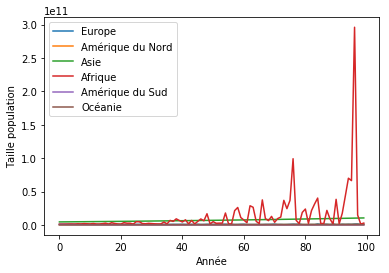

In [137]:
L1=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[0]
L2=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[1]
L3=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[2]
L4=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[3]
L5=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[4]
L6=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[5]

plot_pop(L1,L2,L3,L4,L5,L6,pop)

Même si nous voyons dans l'ensemble l'évolution de la population, les résultats sont trop imprécis pour en déduire quoique ce soit, du au fait que l'on prenne les résultats à l'échelle mondiale. Il faut donc visualiser la situation à l'échelle continentale.

## Graphiques de la population sur chaque continent

In [97]:
def plot_pop1(L1,pop):
    plt.figure()
    plt.plot(L1)
    plt.legend([continents[0]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop2(L2,pop):
    plt.figure()
    plt.plot(L2, color="orange")
    plt.legend([continents[1]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop3(L3,pop):
    plt.figure()
    plt.plot(L3, color="green")
    plt.legend([continents[2]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop4(L4,pop):
    plt.figure()
    plt.plot(L4, color="red")
    plt.legend([continents[3]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop5(L5,pop):
    plt.figure()
    plt.plot(L5, color="purple")
    plt.legend([continents[4]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

def plot_pop6(L6,pop):
    plt.figure()
    plt.plot(L6, color="brown")
    plt.legend([continents[5]])
    plt.xlabel("Année")
    plt.ylabel("Taille population")
    plt.show()
    return

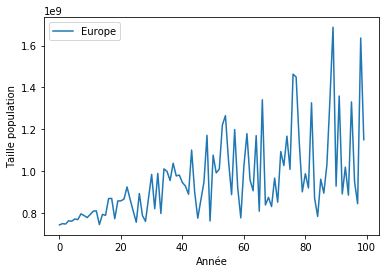

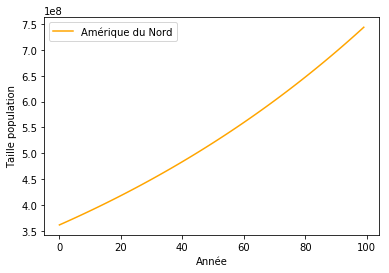

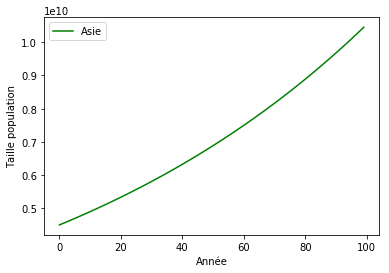

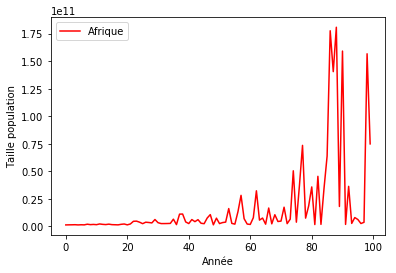

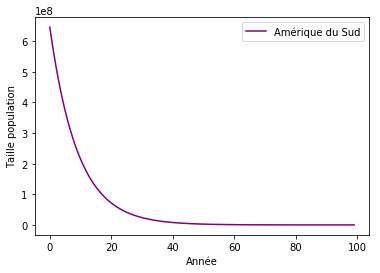

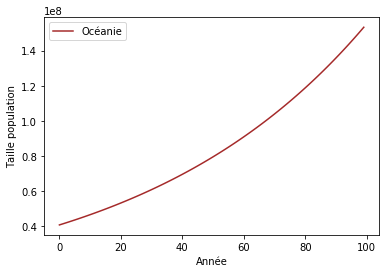

In [101]:
L1=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[0]
L2=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[1]
L3=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[2]
L4=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[3]
L5=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[4]
L6=list_pop(100,pop,33,32,True,False,16,50,False,True,42,12,False,False,19,13,True,False,8,19,True,True,12,8,False,False)[5]

plot_pop1(L1,pop)
plot_pop2(L2,pop)
plot_pop3(L3,pop)
plot_pop4(L4,pop)
plot_pop5(L5,pop)
plot_pop6(L6,pop)